In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings 
warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [833]:
train = pd.read_csv('/Users/8skiphone/Desktop/Competition/SIGNATE/従業員の離職予測/train.csv')

In [834]:
test = pd.read_csv('/Users/8skiphone/Desktop/Competition/SIGNATE/従業員の離職予測/test.csv')

In [835]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,1077.855000,2.655833,66.261667,2.716667,2.125833,...,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,415.420917,8.134144,1.060390,580.185495,1.139502,20.257801,0.675847,1.185821,...,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,59.231581,-0.023999,1.000000,12.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,699.000000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,1059.000000,3.000000,67.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,1591.000000,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,2060.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


In [836]:
train.shape

(1200, 34)

In [837]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1200 non-null   int64  
 1   Age                       1200 non-null   int64  
 2   BusinessTravel            1200 non-null   object 
 3   DailyRate                 1200 non-null   float64
 4   Department                1200 non-null   object 
 5   DistanceFromHome          1200 non-null   float64
 6   Education                 1200 non-null   int64  
 7   EducationField            1200 non-null   object 
 8   EmployeeNumber            1200 non-null   int64  
 9   EnvironmentSatisfaction   1200 non-null   int64  
 10  Gender                    1200 non-null   object 
 11  HourlyRate                1200 non-null   int64  
 12  JobInvolvement            1200 non-null   int64  
 13  JobLevel                  1200 non-null   int64  
 14  JobRole 

In [838]:
print(train.shape)

(1200, 34)


In [839]:
display(train)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,1291,4,...,80,0,1,3,2,11,8,7,0,0
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,1587,2,...,80,1,20,1,1,5,9,4,4,0
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,1591,2,...,80,1,4,3,3,3,2,0,2,0
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1572,1,...,80,1,6,0,1,5,4,7,7,1
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,981,2,...,80,1,8,3,3,1,0,0,0,0


In [840]:
 cal_categoric = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Gender','Over18','OverTime','Attrition']
train_numeric  = train.drop(cal_categoric, axis = 1)
train_categoric = train[cal_categoric]
train_categoric = train_categoric.drop('Gender', axis =1)
train_categoric = train_categoric.drop('Over18', axis = 1)
print(train_categoric)
print(train_categoric['Attrition'].value_counts())

         BusinessTravel              Department    EducationField  \
0         Travel_Rarely  Research & Development           Medical   
1         Travel_Rarely  Research & Development  Technical Degree   
2         Travel_Rarely         Human Resources     Life Sciences   
3         Travel_Rarely  Research & Development           Medical   
4         Travel_Rarely  Research & Development           Medical   
...                 ...                     ...               ...   
1195      Travel_Rarely  Research & Development           Medical   
1196  Travel_Frequently  Research & Development             Other   
1197         Non-Travel         Human Resources     Life Sciences   
1198  Travel_Frequently                   Sales         Marketing   
1199      Travel_Rarely  Research & Development     Life Sciences   

                        JobRole MaritalStatus OverTime  Attrition  
0         Laboratory Technician        Single       No          0  
1            Research Scientist    

In [841]:
train_numeric.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,1077.855000,2.655833,66.261667,2.716667,2.125833,...,2.616667,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000
std,575.726036,8.282199,415.420917,8.134144,1.060390,580.185495,1.139502,20.257801,0.675847,1.185821,...,1.066460,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225
min,0.000000,17.000000,59.231581,-0.023999,1.000000,12.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,699.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,1059.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,1591.000000,4.000000,84.000000,3.000000,3.000000,...,3.250000,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,2060.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000


<AxesSubplot:>

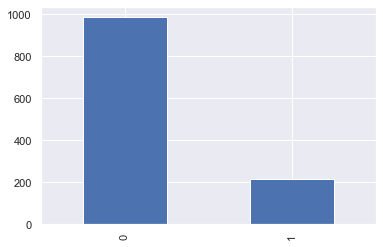

In [842]:
counts_Attrition = train_categoric['Attrition'].value_counts()
counts_Attrition.plot(kind = 'bar')

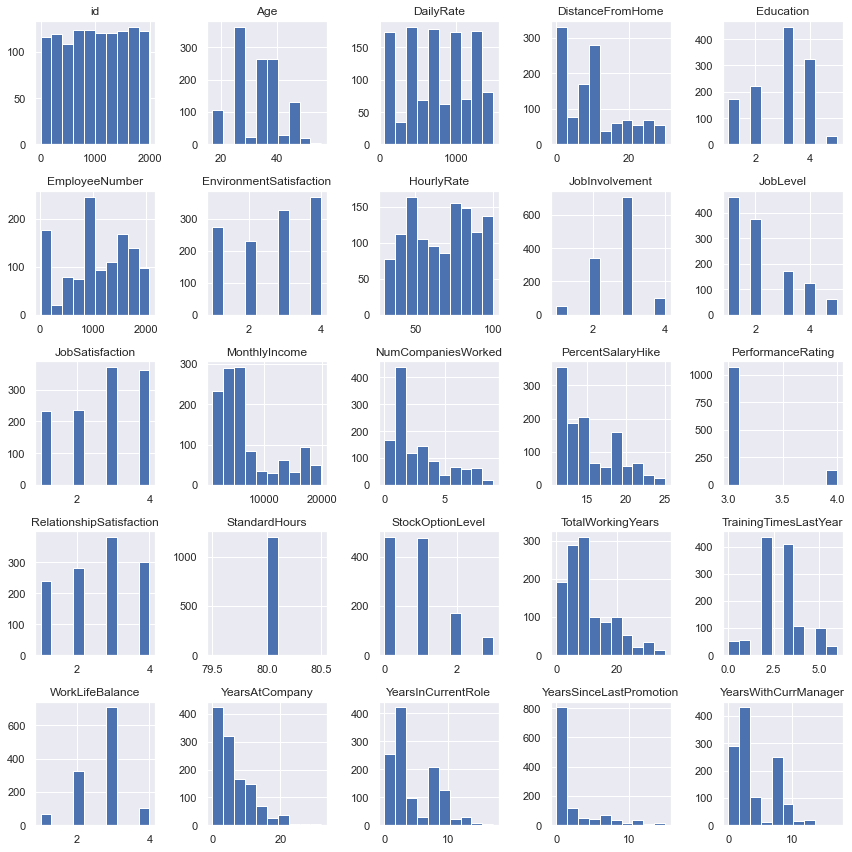

In [843]:
train_numeric.hist(figsize=(12,12))
plt.tight_layout()

In [844]:
train_categoric

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Attrition
0,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Single,No,0
1,Travel_Rarely,Research & Development,Technical Degree,Research Scientist,Divorced,Yes,0
2,Travel_Rarely,Human Resources,Life Sciences,Human Resources,Married,No,0
3,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Divorced,Yes,1
4,Travel_Rarely,Research & Development,Medical,Manufacturing Director,Divorced,Yes,0
...,...,...,...,...,...,...,...
1195,Travel_Rarely,Research & Development,Medical,Research Director,Married,No,0
1196,Travel_Frequently,Research & Development,Other,Manufacturing Director,Married,Yes,0
1197,Non-Travel,Human Resources,Life Sciences,Healthcare Representative,Divorced,No,0
1198,Travel_Frequently,Sales,Marketing,Sales Executive,Divorced,No,0


In [845]:
train_tmp = pd.concat([train_categoric['Attrition'],train_numeric],axis = 1)
print(train_tmp.head(5))

   Attrition  id  Age    DailyRate  DistanceFromHome  Education  \
0          0   0   26   450.941476          7.601074          3   
1          0   3   47   730.235896         26.739489          3   
2          0   7   26  1082.560066          7.374739          3   
3          1  10   46   706.247579         14.791373          1   
4          0  11   25   500.610860          2.146966          4   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0            1291                        4          43               2  ...   
1            1587                        2          98               2  ...   
2            1591                        2          84               2  ...   
3            1572                        1          79               2  ...   
4             981                        2          98               3  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                

In [846]:
print(train_tmp.query('Attrition == 0').head())
print(train_tmp.query('Attrition == 1').head())

   Attrition  id  Age    DailyRate  DistanceFromHome  Education  \
0          0   0   26   450.941476          7.601074          3   
1          0   3   47   730.235896         26.739489          3   
2          0   7   26  1082.560066          7.374739          3   
4          0  11   25   500.610860          2.146966          4   
5          0  12   36  1025.521404          1.689570          3   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0            1291                        4          43               2  ...   
1            1587                        2          98               2  ...   
2            1591                        2          84               2  ...   
4             981                        2          98               3  ...   
5            1027                        1          48               3  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                

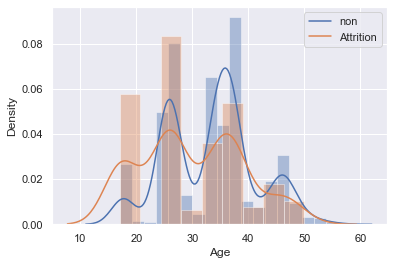

In [847]:
train_Age_non = train_tmp.query('Attrition ==0')['Age']
train_Age_Attrition = train_tmp.query('Attrition == 1')['Age']
sns.distplot(train_Age_non)
sns.distplot(train_Age_Attrition)
plt.legend(labels=["non", "Attrition"], loc='upper right')
plt.show()

In [848]:
train_tmp

,Attrition,id,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,26,450.941476,7.601074,3,1291,4,43,2,...,3,80,0,1,3,2,11,8,7,0
1,0,3,47,730.235896,26.739489,3,1587,2,98,2,...,3,80,1,20,1,1,5,9,4,4
2,0,7,26,1082.560066,7.374739,3,1591,2,84,2,...,2,80,1,4,3,3,3,2,0,2
3,1,10,46,706.247579,14.791373,1,1572,1,79,2,...,4,80,1,6,0,1,5,4,7,7
4,0,11,25,500.610860,2.146966,4,981,2,98,3,...,2,80,1,8,3,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,1988,49,969.251891,13.243579,2,1587,4,67,3,...,2,80,0,33,3,2,3,2,1,2
1196,0,1994,37,437.940367,2.339438,1,137,4,82,3,...,4,80,0,6,5,2,9,2,0,8
1197,0,1996,40,978.883360,10.214979,3,1587,3,40,2,...,2,80,1,19,2,3,14,9,9,9
1198,0,1997,37,170.494984,2.639879,2,120,1,93,4,...,1,80,2,6,5,3,3,2,0,3


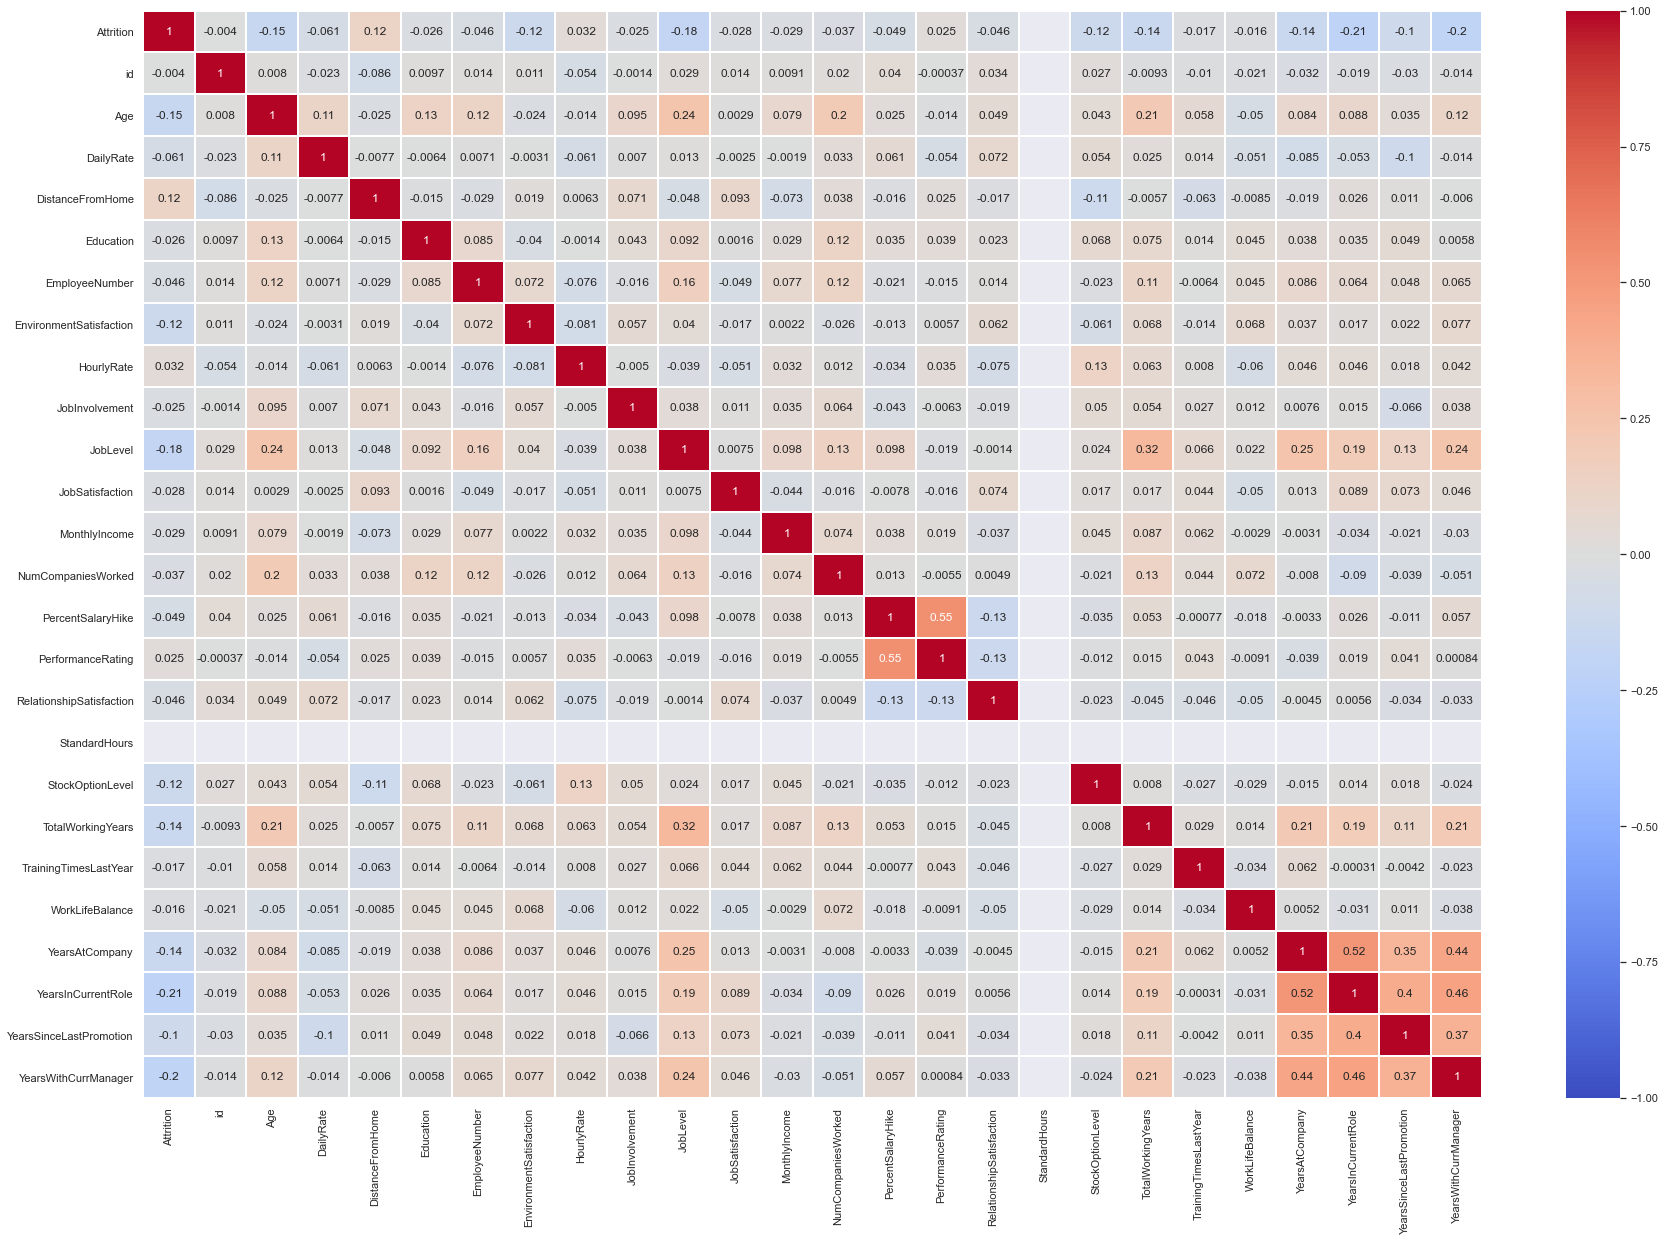

In [849]:
plt.figure(figsize=(30,20))
sns.heatmap(train_tmp.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=1)
plt.show()

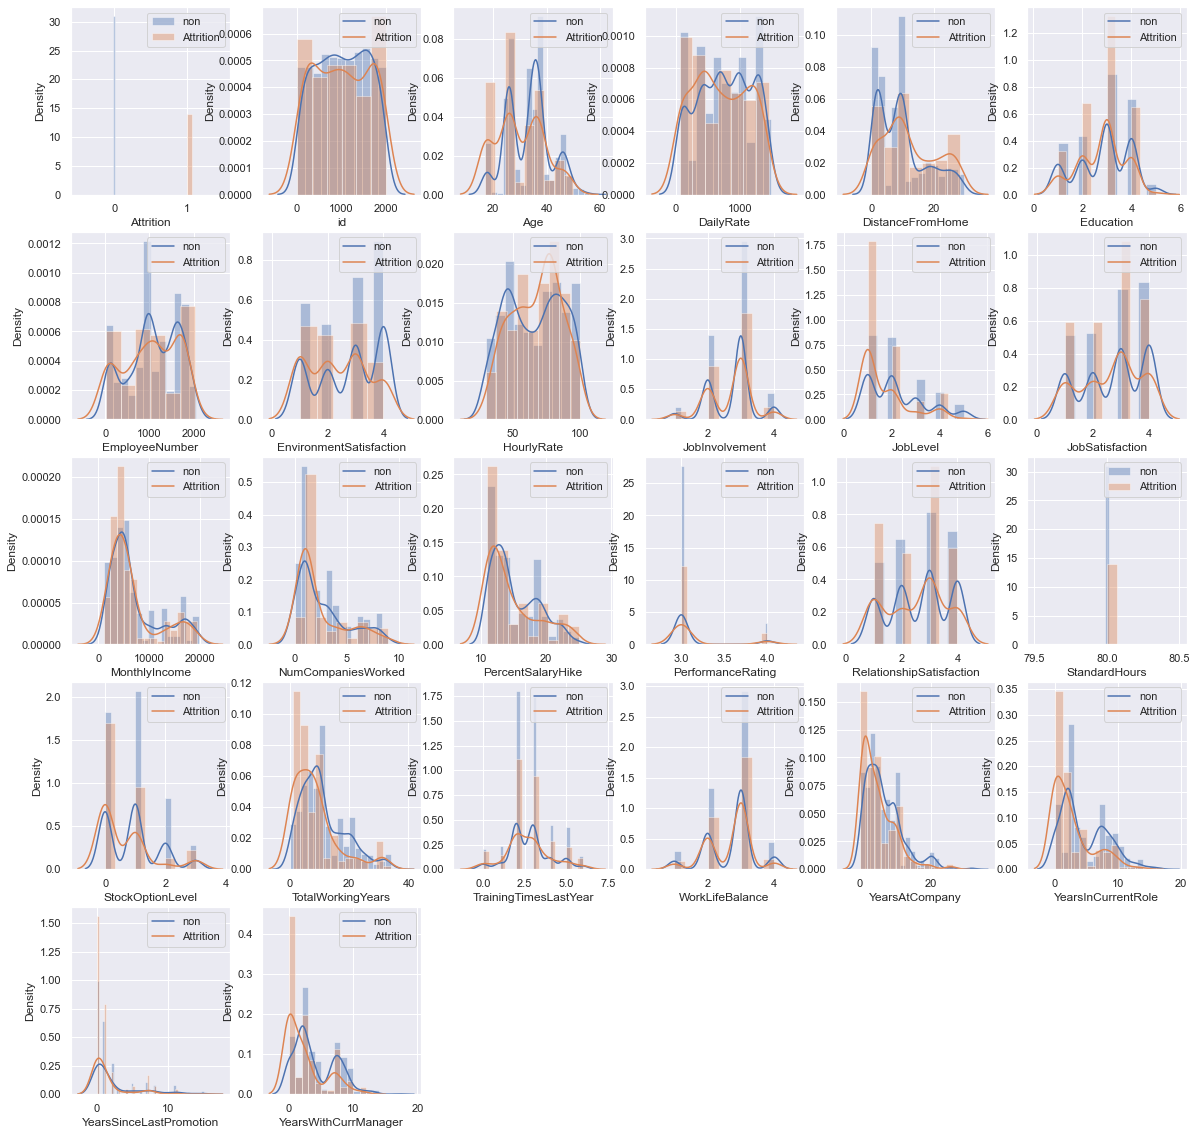

In [850]:
plt.figure(figsize=(20, 20))

for ncol, colname in enumerate(train_tmp.columns):
    plt.subplot(5,6, ncol+1)
    sns.distplot(train_tmp.query("Attrition==0")[colname])
    sns.distplot(train_tmp.query("Attrition==1")[colname])
    plt.legend(labels=["non", "Attrition"], loc='upper right')
plt.show()

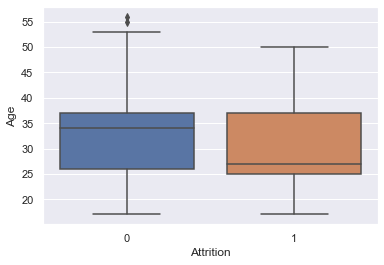

In [851]:
sns.boxplot(x = 'Attrition' , y = 'Age', data = train_tmp)
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

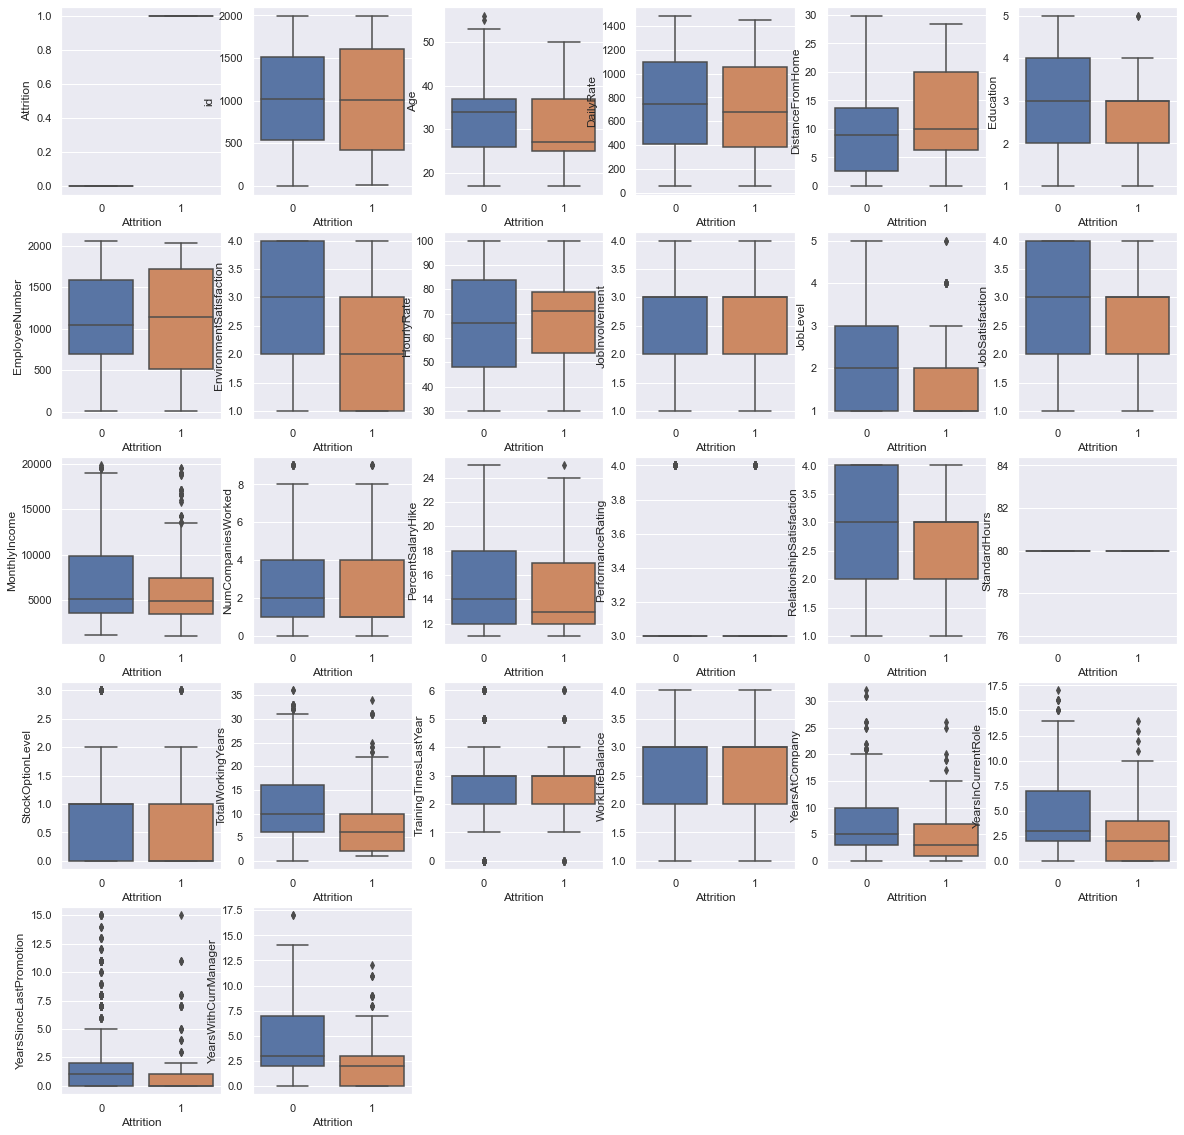

In [852]:
plt.figure(figsize=(20, 20))
for ncol, colname in enumerate(train_tmp.columns):
    plt.subplot(5, 6, ncol+1)
    sns.boxplot(x= 'Attrition', y=colname, data=train_tmp)
    plt.xlabel('Attrition')
    plt.ylabel(colname)
plt.show()

In [853]:
for x in train_categoric:
    print(train_categoric.value_counts(x))
    print(x)
    print('======\n')

BusinessTravel
Travel_Rarely        808
Travel_Frequently    263
Non-Travel           129
dtype: int64
BusinessTravel

Department
Research & Development    773
Sales                     381
Human Resources            46
dtype: int64
Department

EducationField
Life Sciences       501
Medical             334
Marketing           154
Technical Degree     98
Other                97
Human Resources      16
dtype: int64
EducationField

JobRole
Research Scientist           252
Sales Executive              249
Laboratory Technician        179
Manufacturing Director       129
Sales Representative         101
Healthcare Representative     92
Research Director             90
Manager                       75
Human Resources               33
dtype: int64
JobRole

MaritalStatus
Married     578
Single      359
Divorced    263
dtype: int64
MaritalStatus

OverTime
No     882
Yes    318
dtype: int64
OverTime

Attrition
0    987
1    213
dtype: int64
Attrition



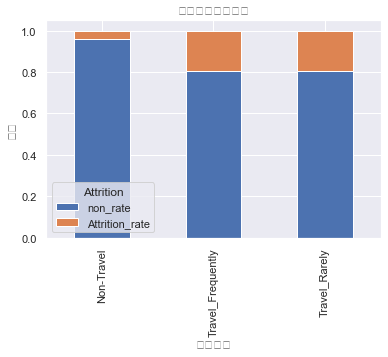

In [854]:
cross_BusinessTravel = pd.crosstab(train_categoric['BusinessTravel'],train_categoric['Attrition'],margins =True)
non_rate = cross_BusinessTravel[0]/cross_BusinessTravel['All']
Attrition_rate = cross_BusinessTravel[1]/cross_BusinessTravel['All']
cross_BusinessTravel['non_rate'] = non_rate
cross_BusinessTravel['Attrition_rate'] = Attrition_rate
cross_BusinessTravel = cross_BusinessTravel.drop(index = ['All'])
df_bar = cross_BusinessTravel[['non_rate','Attrition_rate']]
df_bar.plot.bar(stacked=True)
plt.title('出張と離職の関係')
plt.xlabel('出張頻度')
plt.ylabel('割合')
plt.show()

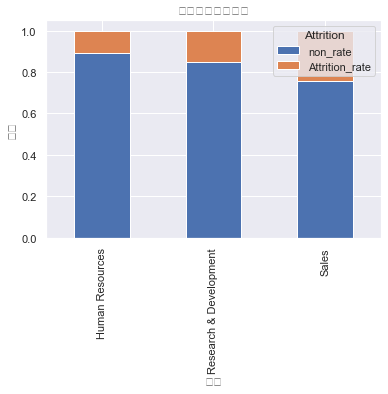

In [855]:
cross_Department = pd.crosstab(train_categoric['Department'],train_categoric['Attrition'],margins =True)
non_rate = cross_Department[0]/cross_Department['All']
Attrition_rate = cross_Department[1]/cross_Department['All']
cross_Department['non_rate'] = non_rate
cross_Department['Attrition_rate'] = Attrition_rate
cross_Department = cross_Department.drop(index = ['All'])
df_bar = cross_Department[['non_rate','Attrition_rate']]
df_bar.plot.bar(stacked=True)
plt.title('部署と離職の関係')
plt.xlabel('部署')
plt.ylabel('割合')
plt.show()

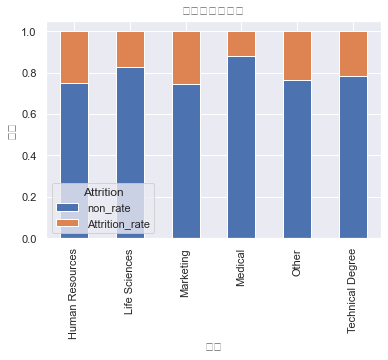

In [856]:
cross_EducationField = pd.crosstab(train_categoric['EducationField'],train_categoric['Attrition'],margins =True)
non_rate = cross_EducationField[0]/cross_EducationField['All']
Attrition_rate = cross_EducationField[1]/cross_EducationField['All']
cross_EducationField['non_rate'] = non_rate
cross_EducationField['Attrition_rate'] = Attrition_rate
cross_EducationField
cross_EducationField = cross_EducationField.drop(index = ['All'])
df_bar = cross_EducationField[['non_rate','Attrition_rate']]
df_bar.plot.bar(stacked=True)
plt.title('学習分野と離職')
plt.xlabel('学歴')
plt.ylabel('割合')
plt.show()

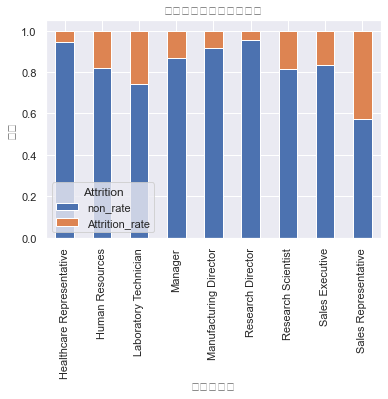

In [857]:
cross_JobRole = pd.crosstab(train_categoric['JobRole'],train_categoric['Attrition'],margins =True)
non_rate = cross_JobRole[0]/cross_JobRole['All']
Attrition_rate = cross_JobRole[1]/cross_JobRole['All']
cross_JobRole['non_rate'] = non_rate
cross_JobRole['Attrition_rate'] = Attrition_rate
cross_JobRole
cross_JobRole = cross_JobRole.drop(index = ['All'])
df_bar = cross_JobRole[['non_rate','Attrition_rate']]
df_bar.plot.bar(stacked=True)
plt.title('仕事の役割と離職の関係')
plt.xlabel('仕事の役割')
plt.ylabel('割合')
plt.show()

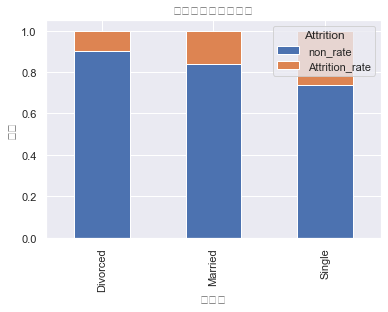

In [858]:
cross_MaritalStatus = pd.crosstab(train_categoric['MaritalStatus'],train_categoric['Attrition'],margins =True)
non_rate = cross_MaritalStatus[0]/cross_MaritalStatus['All']
Attrition_rate = cross_MaritalStatus[1]/cross_MaritalStatus['All']
cross_MaritalStatus['non_rate'] = non_rate
cross_MaritalStatus['Attrition_rate'] = Attrition_rate
cross_MaritalStatus = cross_MaritalStatus.drop(index = ['All'])
df_bar = cross_MaritalStatus[['non_rate','Attrition_rate']]
df_bar.plot.bar(stacked=True)
plt.title('結婚歴と離職の関係')
plt.xlabel('結婚歴')
plt.ylabel('割合')
plt.show()

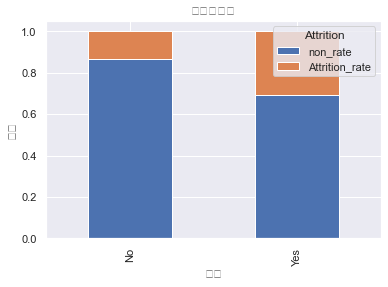

In [859]:
cross_OverTime = pd.crosstab(train_categoric['OverTime'],train_categoric['Attrition'],margins =True)
non_rate = cross_OverTime[0]/cross_OverTime['All']
Attrition_rate = cross_OverTime[1]/cross_OverTime['All']
cross_OverTime['non_rate'] = non_rate
cross_OverTime['Attrition_rate'] = Attrition_rate
cross_OverTime
cross_OverTime = cross_OverTime.drop(index = ['All'])
df_bar = cross_OverTime[['non_rate','Attrition_rate']]
df_bar.plot.bar(stacked=True)
plt.title('残業と離職')
plt.xlabel('残業')
plt.ylabel('割合')
plt.show()

In [860]:
train_categoric

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Attrition
0,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Single,No,0
1,Travel_Rarely,Research & Development,Technical Degree,Research Scientist,Divorced,Yes,0
2,Travel_Rarely,Human Resources,Life Sciences,Human Resources,Married,No,0
3,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Divorced,Yes,1
4,Travel_Rarely,Research & Development,Medical,Manufacturing Director,Divorced,Yes,0
...,...,...,...,...,...,...,...
1195,Travel_Rarely,Research & Development,Medical,Research Director,Married,No,0
1196,Travel_Frequently,Research & Development,Other,Manufacturing Director,Married,Yes,0
1197,Non-Travel,Human Resources,Life Sciences,Healthcare Representative,Divorced,No,0
1198,Travel_Frequently,Sales,Marketing,Sales Executive,Divorced,No,0


In [861]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
oe = preprocessing.OrdinalEncoder()
train_categoric_encoded = oe.fit_transform(train_categoric[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']].values)
print('エンコード結果: ', encoded)

エンコード結果:  [[2. 1. 2. 2. 0.]
 [2. 1. 6. 0. 1.]
 [2. 0. 1. 1. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [1. 2. 7. 0. 0.]
 [2. 1. 0. 0. 0.]]


In [862]:
type(train_categoric_encoded)

numpy.ndarray

In [863]:
type(train_tmp)

pandas.core.frame.DataFrame

In [864]:
train_categoric = pd.DataFrame(train_categoric_encoded)
train_categoric

,0,1,2,3,4,5
0,2.0,1.0,3.0,2.0,2.0,0.0
1,2.0,1.0,5.0,6.0,0.0,1.0
2,2.0,0.0,1.0,1.0,1.0,0.0
3,2.0,1.0,3.0,2.0,0.0,1.0
4,2.0,1.0,3.0,4.0,0.0,1.0
...,...,...,...,...,...,...
1195,2.0,1.0,3.0,5.0,1.0,0.0
1196,1.0,1.0,4.0,4.0,1.0,1.0
1197,0.0,0.0,1.0,0.0,0.0,0.0
1198,1.0,2.0,2.0,7.0,0.0,0.0


In [865]:
train =  pd.concat([train_categoric,train_tmp],axis = 1)
train

,0,1,2,3,4,5,Attrition,id,Age,DailyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.0,1.0,3.0,2.0,2.0,0.0,0,0,26,450.941476,...,3,80,0,1,3,2,11,8,7,0
1,2.0,1.0,5.0,6.0,0.0,1.0,0,3,47,730.235896,...,3,80,1,20,1,1,5,9,4,4
2,2.0,0.0,1.0,1.0,1.0,0.0,0,7,26,1082.560066,...,2,80,1,4,3,3,3,2,0,2
3,2.0,1.0,3.0,2.0,0.0,1.0,1,10,46,706.247579,...,4,80,1,6,0,1,5,4,7,7
4,2.0,1.0,3.0,4.0,0.0,1.0,0,11,25,500.610860,...,2,80,1,8,3,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2.0,1.0,3.0,5.0,1.0,0.0,0,1988,49,969.251891,...,2,80,0,33,3,2,3,2,1,2
1196,1.0,1.0,4.0,4.0,1.0,1.0,0,1994,37,437.940367,...,4,80,0,6,5,2,9,2,0,8
1197,0.0,0.0,1.0,0.0,0.0,0.0,0,1996,40,978.883360,...,2,80,1,19,2,3,14,9,9,9
1198,1.0,2.0,2.0,7.0,0.0,0.0,0,1997,37,170.494984,...,1,80,2,6,5,3,3,2,0,3


In [866]:
train_y = pd.read_csv('/Users/8skiphone/Desktop/Competition/SIGNATE/従業員の離職予測/train.csv')
train = train.drop('Attrition', axis =1)
X = train
y = train_y['Attrition']

In [867]:
X

,0,1,2,3,4,5,id,Age,DailyRate,DistanceFromHome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.0,1.0,3.0,2.0,2.0,0.0,0,26,450.941476,7.601074,...,3,80,0,1,3,2,11,8,7,0
1,2.0,1.0,5.0,6.0,0.0,1.0,3,47,730.235896,26.739489,...,3,80,1,20,1,1,5,9,4,4
2,2.0,0.0,1.0,1.0,1.0,0.0,7,26,1082.560066,7.374739,...,2,80,1,4,3,3,3,2,0,2
3,2.0,1.0,3.0,2.0,0.0,1.0,10,46,706.247579,14.791373,...,4,80,1,6,0,1,5,4,7,7
4,2.0,1.0,3.0,4.0,0.0,1.0,11,25,500.610860,2.146966,...,2,80,1,8,3,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2.0,1.0,3.0,5.0,1.0,0.0,1988,49,969.251891,13.243579,...,2,80,0,33,3,2,3,2,1,2
1196,1.0,1.0,4.0,4.0,1.0,1.0,1994,37,437.940367,2.339438,...,4,80,0,6,5,2,9,2,0,8
1197,0.0,0.0,1.0,0.0,0.0,0.0,1996,40,978.883360,10.214979,...,2,80,1,19,2,3,14,9,9,9
1198,1.0,2.0,2.0,7.0,0.0,0.0,1997,37,170.494984,2.639879,...,1,80,2,6,5,3,3,2,0,3


In [868]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    1
Name: Attrition, Length: 1200, dtype: int64

In [869]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =1)

In [870]:
X_train.describe()

,0,1,2,3,4,5,id,Age,DailyRate,DistanceFromHome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.0,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,1.573958,1.276042,2.217708,4.705208,1.080208,0.276042,1018.604167,32.713542,747.566704,10.219854,...,2.614583,80.0,0.855208,10.591667,2.755208,2.700000,6.457292,4.291667,2.193750,3.815625
std,0.679469,0.520536,1.306716,2.389492,0.725539,0.447271,574.130776,8.274754,413.229053,8.047215,...,1.069726,0.0,0.877760,7.719667,1.249598,0.710123,5.277715,3.689222,3.384927,3.310861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,59.231581,-0.023999,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,532.500000,26.000000,403.208688,2.673705,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,2.000000,1.000000,2.000000,5.000000,1.000000,0.000000,1030.000000,34.000000,729.680919,9.414854,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000,7.000000,2.000000,1.000000,1516.250000,37.000000,1080.628068,15.231438,...,3.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,2.000000,2.000000,5.000000,8.000000,2.000000,1.000000,1998.000000,56.000000,1484.979305,29.890208,...,4.000000,80.0,3.000000,36.000000,6.000000,4.000000,32.000000,17.000000,15.000000,17.000000


In [871]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 31)
(240, 31)
(960,)
(240,)


In [872]:
n_train0, n_train1 = len(train_y[train_y['Attrition'] == 0]), len(train_y[train_y['Attrition'] == 1])
n_all = n_train0+n_train1
print('train0 の割合 :',n_train0/n_all) # train0(離職しなかった人)の割合
print('train1 の割合 :',n_train1/n_all) # train1(離職者)の割合

train0 の割合 : 0.8225
train1 の割合 : 0.1775


In [873]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)

In [874]:
# 真値と予測値の表示
test_pred = pd.DataFrame({'train':y_test,'test_pred':y_test_pred})
display(test_pred)

# 真値と予測確率の表示
test_pred_prob = pd.DataFrame({'train':y_test, 'train0_prob':y_test_pred_proba[:,0], 'train1_prob':y_test_pred_proba[:,1]})
display(test_pred_prob)

,train,test_pred
636,0,0
683,0,0
1033,0,0
190,0,0
1083,0,0


,train,train0_prob,train1_prob
636,0,0.997666,0.002334
683,0,0.936179,0.063821
1033,0,0.925240,0.074760
190,0,0.921210,0.078790
1083,0,0.985225,0.014775


In [875]:
acc = accuracy_score(y_test,y_test_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_test,y_test_pred_proba) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_test,y_test_pred_proba[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.8291666666666667
logloss : 0.5053388069200966
AUC : 0.7807814897886908


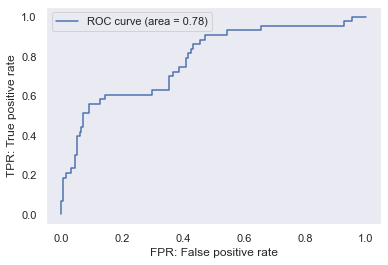

In [876]:
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_proba[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [877]:
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)

In [878]:
# 真値と予測値の表示
train_pred = pd.DataFrame({'train':y_train,'test_pred':y_train_pred})
display(train_pred)

# 真値と予測確率の表示
train_pred_prob = pd.DataFrame({'train':y_train, 'train0_prob':y_train_pred_proba[:,0], 'train1_prob':y_train_pred_proba[:,1]})
display(train_pred_prob)

,train,test_pred
1184,0,0
771,0,0
329,0,0
587,0,0
746,0,0


,train,train0_prob,train1_prob
1184,0,0.989837,0.010163
771,0,0.999705,0.000295
329,0,0.998631,0.001369
587,0,0.999917,0.000083
746,0,0.995444,0.004556


In [879]:
acc = accuracy_score(y_train,y_train_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_train,y_train_pred_proba) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_train,y_train_pred_proba[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 1.0
logloss : 0.010602317736848102
AUC : 1.0


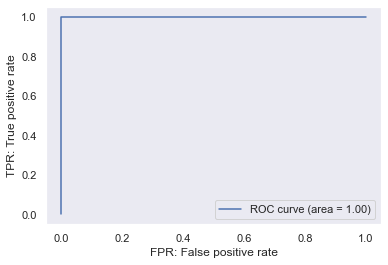

In [880]:
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train,y_train_pred_proba[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [889]:
test_cal_categoric = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Gender','Over18','OverTime']
test_numeric  = test.drop(test_cal_categoric, axis = 1)
test_categoric = test[test_cal_categoric]
test_categoric = test_categoric.drop('Gender', axis =1)
train_categoric = test_categoric.drop('Over18', axis = 1)
print(test_categoric)

        BusinessTravel              Department EducationField  \
0    Travel_Frequently  Research & Development  Life Sciences   
1        Travel_Rarely  Research & Development        Medical   
2    Travel_Frequently  Research & Development  Life Sciences   
3        Travel_Rarely  Research & Development        Medical   
4        Travel_Rarely  Research & Development  Life Sciences   
..                 ...                     ...            ...   
795      Travel_Rarely  Research & Development        Medical   
796      Travel_Rarely  Research & Development        Medical   
797  Travel_Frequently  Research & Development        Medical   
798  Travel_Frequently  Research & Development          Other   
799      Travel_Rarely  Research & Development          Other   

                   JobRole MaritalStatus Over18 OverTime  
0       Research Scientist      Divorced      Y       No  
1    Laboratory Technician       Married      Y       No  
2        Research Director      Divorced  

In [896]:
tetest_encoded = oe.fit_transform(test_categoric[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']].values)
test_encoded

,0,1,2,3,4,5
0,1.0,1.0,1.0,6.0,0.0,0.0
1,2.0,1.0,3.0,2.0,1.0,0.0
2,1.0,1.0,1.0,5.0,0.0,0.0
3,2.0,1.0,3.0,3.0,2.0,0.0
4,2.0,1.0,1.0,5.0,0.0,0.0
...,...,...,...,...,...,...
795,2.0,1.0,3.0,2.0,1.0,0.0
796,2.0,1.0,3.0,7.0,2.0,0.0
797,1.0,1.0,3.0,1.0,2.0,0.0
798,1.0,1.0,4.0,6.0,2.0,0.0


In [897]:
test_numeric = test.select_dtypes(exclude='object')
test_numeric

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,34,358.039056,9.926847,3,843,1,73,3,1,...,3,80,1,11,2,3,7,7,2,7
1,2,37,749.376719,10.391959,3,1361,1,78,3,1,...,4,80,0,5,3,2,1,3,1,0
2,4,34,958.484177,3.297025,3,975,2,73,3,3,...,3,80,1,21,2,2,4,3,1,4
3,5,34,79.174592,2.430032,4,1591,3,53,3,5,...,4,80,3,9,3,3,20,6,1,4
4,6,29,943.191218,10.017149,2,1803,3,77,3,2,...,3,80,1,25,2,4,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1991,26,1437.994264,1.312387,3,716,1,84,2,1,...,4,80,1,1,3,3,13,10,5,13
796,1992,25,446.793690,6.906007,4,1719,1,40,2,2,...,3,80,0,6,5,2,5,4,0,4
797,1993,26,97.635598,10.730256,3,1027,3,37,3,1,...,2,80,0,9,2,3,5,4,1,4
798,1995,25,69.246616,0.878959,3,1766,2,85,2,1,...,2,80,2,5,3,3,5,0,0,0


In [899]:
test_encoded = pd.DataFrame(test_encoded)
test_encoded

,0,1,2,3,4,5
0,1.0,1.0,1.0,6.0,0.0,0.0
1,2.0,1.0,3.0,2.0,1.0,0.0
2,1.0,1.0,1.0,5.0,0.0,0.0
3,2.0,1.0,3.0,3.0,2.0,0.0
4,2.0,1.0,1.0,5.0,0.0,0.0
...,...,...,...,...,...,...
795,2.0,1.0,3.0,2.0,1.0,0.0
796,2.0,1.0,3.0,7.0,2.0,0.0
797,1.0,1.0,3.0,1.0,2.0,0.0
798,1.0,1.0,4.0,6.0,2.0,0.0


In [900]:
test =  pd.concat([test_encoded,test_numeric],axis = 1)
Z = test
pred = model.predict(Z)

In [901]:
print(pred)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [902]:
sample_submit = pd.read_csv("/Users/8skiphone/Desktop/Competition/SIGNATE/従業員の離職予測/sample_submit.csv", index_col=0, header=None) # 応募用サンプルファイル

In [903]:
sample_submit

,1
0,
1,0
2,0
4,0
5,0
6,0
...,...
1991,0
1992,0
1993,0


In [904]:
sample_submit[1] = pred
sample_submit.to_csv('submit.csv', header=None)

In [905]:
sample_submit

,1
0,
1,0
2,0
4,0
5,0
6,0
...,...
1991,0
1992,0
1993,0
